# METHODOLOGIES I :

 ##   (A). Classification
 

##  (i). Data Acquisition Exercises


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from pydataset import data

import acquire

from acquire import get_titanic_data
from acquire import get_iris_data
from acquire import get_telco_data
from acquire import prep_iris
from acquire import get_tidy_date_attendance
from acquire import get_tidy_data_coffee_level
from acquire import get_tidy_data_cakes_recipe


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from scipy import stats

from scipy.stats import mannwhitneyu

# from ggplot import *

import warnings
warnings.filterwarnings('ignore')

import env

NOTE: Exercise Number 1 - 4 are all github setup
---------------------------------------------------------

## (4). In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [49]:
df_iris = pd.DataFrame(data('iris'))
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [50]:
# Rows & Columns
df_iris.shape

(150, 5)

In [55]:
# Columns replace '.': '_'

df_iris = df_iris.columns.str.replace('.','_')


In [58]:
# Columns DataTypes
# df_iris.dtypes

In [12]:
# Numeric Summary
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## (5). Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

-  Make sure that the spreadsheet is publicly visible under your sharing settings.

In [60]:
url = 'https://docs.google.com/spreadsheets/d/13mVTE4FD048lF84rWBCm1LfMHddA6gqivf0PhTaylB8/edit?usp=sharing'

export_url = url.replace('/edit?usp=','/export?format=csv#gid=')

df_google_sheets = pd.read_csv(export_url)

df_google_sheets.head()

,Unnamed: 0,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,pather_dependants,average_montly_charges
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,9.044207,No,True,False,True,True,True,3,329.450
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,9.055092,No,False,False,True,True,True,0,301.150
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,3.800406,Yes,False,True,True,True,True,0,177.375
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,12.631122,Yes,False,True,True,True,True,1,667.925
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,3.187128,Yes,True,True,True,True,True,1,175.650


In [61]:
# From local directory file

# df_google_sheets = pd.read_csv('~/Documents/Table1_CustDetails.csv')
# df_google_sheets.head()

-  Assign the first 100 rows to a new dataframe, df_excel_sample


In [62]:
df_excel_sample = df_google_sheets.head(100)
df_excel_sample.head()

,Unnamed: 0,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,pather_dependants,average_montly_charges
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,9.044207,No,True,False,True,True,True,3,329.450
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,9.055092,No,False,False,True,True,True,0,301.150
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,3.800406,Yes,False,True,True,True,True,0,177.375
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,12.631122,Yes,False,True,True,True,True,1,667.925
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,3.187128,Yes,True,True,True,True,True,1,175.650


-  Print the number of rows of your original dataframe


In [16]:
df_google_sheets.shape[0]

7049

-  Print the first 5 column names


In [17]:
df_google_sheets.columns[:6]

Index(['Unnamed: 0', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service'],
      dtype='object')

-  Print the column names that have a data type of object


In [18]:
object_columns = df_google_sheets.select_dtypes(include=['object']).columns
object_columns

# num_cols = df_google._get_numeric_data().columns
# num_cols


Index(['Unnamed: 0', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

-  Compute the range for each of the numeric variables.


In [19]:
max_int_dtype = df_google_sheets.select_dtypes(include ='int64').max()
min_int_dtype = df_google_sheets.select_dtypes(include ='int64').min()

print(f'Min range: {min_int_dtype} Max range: {max_int_dtype}')

Min range: is_senior_citizen    0
phone_service        0
internet_service     0
contract_type        0
pather_dependants    0
dtype: int64 Max range: is_senior_citizen    1
phone_service        2
internet_service     2
contract_type        2
pather_dependants    3
dtype: int64


## (6). Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.



In [20]:
df_excel = pd.read_excel('~/Documents/codeup-data-science/classification-exercises/Table1_CustDetails.xlsx')
df_excel.head()

,,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,pather_dependants,average_montly_charges
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,9.044207,No,True,False,True,True,True,3,329.450
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,9.055092,No,False,False,True,True,True,0,301.150
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,3.800406,Yes,False,True,True,True,True,0,177.375
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,12.631122,Yes,False,True,True,True,True,1,667.925
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,3.187128,Yes,True,True,True,True,True,1,175.650


-  Assign the first 100 rows to a new dataframe, df_excel_sample


In [21]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head()

,,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,pather_dependants,average_montly_charges
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,9.044207,No,True,False,True,True,True,3,329.450
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,9.055092,No,False,False,True,True,True,0,301.150
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,3.800406,Yes,False,True,True,True,True,0,177.375
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,12.631122,Yes,False,True,True,True,True,1,667.925
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,3.187128,Yes,True,True,True,True,True,1,175.650


-  Print the number of rows of your original dataframe


In [22]:
df_excel.shape[0]

7049

Print the first 5 column names


In [23]:
df_excel.columns[:6]

Index([' ', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service'],
      dtype='object')

-  Print the column names that have a data type of object


In [24]:
df_excel.select_dtypes(include=['object'])

,,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


-  Compute the range for each of the numeric variables.


In [25]:
df_excel.select_dtypes(include=['int64'])

,pather_dependants
0,3
1,0
2,0
3,1
4,1
...,...
7044,0
7045,1
7046,0
7047,3


## (7). Read the data from this google sheet into a dataframe, df_google.


-  Print the first 3 rows



In [26]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'

export_url = url.replace('/edit?usp=','/export?format=csv#gid=')

df_google = pd.read_csv(export_url)
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Print the number of rows and columns


In [27]:
df_google.shape[0]

891

-  Print the column names


In [28]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Print the data type of each column


In [29]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-  Print the summary statistics for each of the numeric variables


In [30]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-  Print the unique values for each of your categorical variables


In [32]:
# Is object same as categorical data?

df_google.select_dtypes(include=['object']).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [33]:
# Numeric Columns

num_cols = df_google._get_numeric_data().columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Make a new python module, acquire.py to hold the following data aquisition functions:

-  (1). Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [34]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


-  (2). Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [63]:
get_iris_data().head(10)

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,0,1,5.1,3.5,1.4,0.2,1
1,1,2,4.9,3.0,1.4,0.2,1
2,2,3,4.7,3.2,1.3,0.2,1
3,3,4,4.6,3.1,1.5,0.2,1
4,4,5,5.0,3.6,1.4,0.2,1
5,5,6,5.4,3.9,1.7,0.4,1
6,6,7,4.6,3.4,1.4,0.3,1
7,7,8,5.0,3.4,1.5,0.2,1
8,8,9,4.4,2.9,1.4,0.2,1
9,9,10,4.9,3.1,1.5,0.1,1


-  (3). Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [36]:
get_telco_data().head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


-  (4).Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

-  -> Completed on the acquire.py function

# (B). Data Preparation Exercises

1). Use the function defined in acquire.py to load the IRIS DATA.

In [218]:
# USING IRIS DATA (~~~~~~~IRIS Data troubleshoot tables concat. Species name~~~~~~)

acquire.get_iris_data().head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [75]:
iris = get_iris_data()
iris.head()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,0,1,5.1,3.5,1.4,0.2,1
1,1,2,4.9,3.0,1.4,0.2,1
2,2,3,4.7,3.2,1.3,0.2,1
3,3,4,4.6,3.1,1.5,0.2,1
4,4,5,5.0,3.6,1.4,0.2,1


In [76]:
iris.shape

(150, 7)

2). Drop the species_id and measurement_id columns.

In [66]:
iris_col_drop = ['species_id']

iris = iris.drop(columns = iris_col_drop)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3). Rename the species_name column to just species.



In [71]:
iris = iris.rename(columns = {'species_name': 'species'})
iris.head(10)

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,0,1,5.1,3.5,1.4,0.2,1
1,1,2,4.9,3.0,1.4,0.2,1
2,2,3,4.7,3.2,1.3,0.2,1
3,3,4,4.6,3.1,1.5,0.2,1
4,4,5,5.0,3.6,1.4,0.2,1
5,5,6,5.4,3.9,1.7,0.4,1
6,6,7,4.6,3.4,1.4,0.3,1
7,7,8,5.0,3.4,1.5,0.2,1
8,8,9,4.4,2.9,1.4,0.2,1
9,9,10,4.9,3.1,1.5,0.1,1


4). Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [219]:
iris_dummy = pd.get_dummies(iris[['species']], dummy_na = False, drop_first = True)
iris_dummy

KeyError: "None of [Index(['species'], dtype='object')] are in the [columns]"

In [69]:
# Concat the dummy data with iris data

iris = pd.concat([iris, iris_dummy], axis = 1)

iris.head(5)

NameError: name 'iris_dummy' is not defined

In [12]:
iris = get_iris_data()

5). Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [64]:
iris = acquire.get_iris_data()

def prep_iris(iris):
    
    iris = iris.drop_duplicates()
    
    iris = iris.drop(columns = ['Unnamed: 0'])
    
    iris_dummy = pd.get_dummies(iris[['sepal_width','petal_width']], 
                                      drop_first = [True, True])
    
    iris = pd.concat([iris, iris_dummy], axis = 1)
    
    return iris.drop(columns = ['sepal_width','petal_width'])


prep_iris(iris).head(30)

,measurement_id,sepal_length,petal_length,species_id
0,1,5.1,1.4,1
1,2,4.9,1.4,1
2,3,4.7,1.3,1
3,4,4.6,1.5,1
4,5,5.0,1.4,1
5,6,5.4,1.7,1
6,7,4.6,1.4,1
7,8,5.0,1.5,1
8,9,4.4,1.4,1
9,10,4.9,1.5,1


## Using Titanic Dataset

1). Use the function defined in acquire.py to load the Titanic data.



In [18]:
titanic = get_titanic_data()
titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


2). Drop any unnecessary, unhelpful, or duplicated columns.

In [54]:
# Drop unnecessary cols

titanic_shrinked_cols = titanic.drop(columns=['age','embarked','passenger_id','class', 'Unnamed: 0'])
titanic_shrinked_cols

,survived,pclass,sex,sibsp,parch,fare,deck,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,NaN,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,C,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,NaN,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,C,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,NaN,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,NaN,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,B,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,NaN,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,C,Cherbourg,1,1,0,0


In [55]:
# Drop Duplicates 

titanic_shrinked_no_duplicates = titanic_drop_cols.drop_duplicates()
stripped_titanic  = titanic_shrinked_no_duplicates
stripped_titanic.head()

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,deck,embark_town,alone
0,0,0,3,male,1,0,7.2500,NaN,Southampton,0
1,1,1,1,female,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,0,0,7.9250,NaN,Southampton,1
3,3,1,1,female,1,0,53.1000,C,Southampton,0
4,4,0,3,male,0,0,8.0500,NaN,Southampton,1


3). Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [56]:
cat_cols_titanic = [col for col in stripped_titanic.columns if stripped_titanic[col].dtype  == 'O']
cat_cols_titanic

['sex', 'deck', 'embark_town']

In [57]:
titanic[cat_cols_titanic].value_counts()


sex     deck  embark_town
male    C     Southampton    21
        E     Southampton    16
female  C     Southampton    15
        B     Southampton    13
              Cherbourg      12
        C     Cherbourg      11
male    D     Southampton    10
female  E     Southampton    10
male    C     Cherbourg      10
        B     Cherbourg      10
              Southampton    10
female  D     Southampton    10
              Cherbourg       8
male    A     Southampton     8
        F     Southampton     7
        A     Cherbourg       6
        D     Cherbourg       5
female  G     Southampton     4
        F     Southampton     4
        E     Cherbourg       4
male    C     Queenstown      1
female  F     Cherbourg       1
        E     Queenstown      1
male    E     Cherbourg       1
female  C     Queenstown      1
male    F     Queenstown      1
female  A     Cherbourg       1
dtype: int64

In [58]:
# Drop nulls and normalize (stripped data)

for col in cat_cols_titanic:
    
    normalized_titanic = (titanic[col].value_counts(normalize = True, dropna = False))

    print(normalized_titanic)

male      0.647587
female    0.352413
Name: sex, dtype: float64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


In [59]:
# Dummy Data

dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
dummy_titanic

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [60]:
# Concat Data

titanic = pd.concat([titanic, dummy_titanic], axis = 1)
titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,1,0,1,1,0,1
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0,0,0,0,0,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0,0,1,0,0,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0,0,1,0,0,1
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,1,0,1,1,0,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0,0,1,0,0,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0,0,1,0,0,1
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,1,0,0,1,0,0


4). Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [64]:
row_titanic = acquire.get_titanic_data()


def prep_titanic(row_titanic):
    titanic_df = row_titanic.drop_duplicates()
    
    titanic_df = titanic_df.drop(columns = ['deck', 'embarked', 'class', 'age', 'Unnamed: 0'])
        
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value = 'Southampton')
    
    dummy_titanic = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first = [True, True])
    
    titanic = pd.concat([dummy_titanic, titanic_df], axis = 1)
    
    return titanic.drop(columns = ['sex', 'embark_town'])
    
cleaned_titan_data = prep_titanic(row_titanic)
cleaned_titan_data

,sex_male,embark_town_Queenstown,embark_town_Southampton,passenger_id,survived,pclass,sibsp,parch,fare,alone
0,1,0,1,0,0,3,1,0,7.2500,0
1,0,0,0,1,1,1,1,0,71.2833,0
2,0,0,1,2,1,3,0,0,7.9250,1
3,0,0,1,3,1,1,1,0,53.1000,0
4,1,0,1,4,0,3,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,886,0,2,0,0,13.0000,1
887,0,0,1,887,1,1,0,0,30.0000,1
888,0,0,1,888,0,3,1,2,23.4500,0
889,1,0,0,889,1,1,0,0,30.0000,1


## Using Telco Dataset

1). Use the function defined in acquire.py to load the Telco data.



In [2]:
telco = get_telco_data()
telco.head()

,Unnamed: 0,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


2). Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [8]:
# Check Null Values
telco.isnull().sum()

payment_type_id             0
contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

In [3]:
strip_telco = telco.drop_duplicates()

drop_cols_telco = ['Unnamed: 0', 'tech_support', 'streaming_tv', 'paperless_billing', 
                   'streaming_movies', 'device_protection', 'online_backup', 'online_security']

stripped_telco = strip_telco.drop(columns = (drop_cols_telco))
telco = stripped_telco 
telco

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,65.60,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,No,55.15,742.9,No,DSL,One year,Mailed check
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,No,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


3). Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [9]:
# Get Categorical Data/ Cols

cat_telco = [col for col in telco.columns if telco[col].dtype == 'O']
cat_telco

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'total_charges',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [11]:
# Check all columns Infomation in categorical data

for col in cat_telco:
    
    print(telco[col].value_counts())
    
    print(telco[col].value_counts(normalize = True, dropna = False))

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7043, dtype: float64
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: f

In [81]:
# Encoding 

dummy_telco = pd.get_dummies(telco[['churn','internet_service_type','payment_type', 'monthly_charges']], 
                             dummy_na = False, drop_first = [True, True, True, True])


dummy_telco

,monthly_charges,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,65.60,0,0,0,0,0,1
1,59.90,0,0,0,0,0,1
2,73.90,1,1,0,0,1,0
3,98.00,1,1,0,0,1,0
4,83.90,1,1,0,0,0,1
...,...,...,...,...,...,...,...
7038,55.15,0,0,0,0,0,1
7039,85.10,1,1,0,0,1,0
7040,50.30,0,0,0,0,0,1
7041,67.85,0,0,0,0,0,1


In [82]:
# Concat Data

telco = pd.concat([telco, dummy_telco], axis = 1)

telco

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,monthly_charges,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,0,0,1,65.60,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,0,0,1,59.90,0,0,0,0,0,1
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,0,1,0,73.90,1,1,0,0,1,0
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,0,1,0,98.00,1,1,0,0,1,0
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,0,0,1,83.90,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,...,0,0,1,55.15,0,0,0,0,0,1
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,...,0,1,0,85.10,1,1,0,0,1,0
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,0,0,1,50.30,0,0,0,0,0,1
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,0,0,1,67.85,0,0,0,0,0,1


4). Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [83]:
# Clean data function

telco_data = acquire.get_telco_data()


def prep_telco(telco_data):
    
    t_df = telco_data.drop_duplicates()
    
    t_df = t_df.drop(columns = ['Unnamed: 0', 'tech_support', 'streaming_tv', 'paperless_billing', 
                   'streaming_movies', 'device_protection', 'online_backup', 'online_security'])
    
    dummy_telco_data = pd.get_dummies(t_df[['churn','internet_service_type','payment_type']], 
                                      drop_first = True)
    
    t_df = pd.concat([t_df, dummy_telco_data], axis = 1)
    
    return t_df.drop(columns = ['churn','internet_service_type','payment_type'])
    
   

In [19]:
telco_clean = prep_telco(telco_data)
telco_clean

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,monthly_charges,total_charges,contract_type,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,65.60,593.3,One year,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,59.90,542.4,Month-to-month,0,0,0,0,0,1
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,73.90,280.85,Month-to-month,1,1,0,0,1,0
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,98.00,1237.85,Month-to-month,1,1,0,0,1,0
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,83.90,267.4,Month-to-month,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,No,55.15,742.9,One year,0,0,0,0,0,1
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,85.10,1873.7,Month-to-month,1,1,0,0,1,0
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,No,50.30,92.75,Month-to-month,0,0,0,0,0,1
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,67.85,4627.65,Two year,0,0,0,0,0,1


# (C). Tidy Data Exercises



## 1). Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each 
student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

Desired format

name |
|Billy  |  0.5250|
|Jane   |  0.6875|
|John   |  0.9125|
|Sally  |  0.7625|
Name: grade, dtype: float64


In [161]:
df = acquire.get_tidy_date_attendance()
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [162]:
# Rename the Unnamed column to name

df = df.rename(columns = {'Unnamed: 0': 'name'})

df.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [163]:
scores = {'P':1, 'T': 0.9, 'H':0.5, 'A': 0}

In [164]:
df = df.melt(id_vars = 'name', var_name = 'date', value_name = 'attendance')
df['student_grade'] = round(df.attendance.map(scores), 1)

df.head(15)

,name,date,attendance,student_grade
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9
5,Jane,2018-01-02,P,1.0
6,Billy,2018-01-02,T,0.9
7,John,2018-01-02,T,0.9
8,Sally,2018-01-03,T,0.9
9,Jane,2018-01-03,T,0.9


In [165]:
df.groupby('name').mean()

,student_grade
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


## 2). Coffee Levels

Read the coffee_levels table.

-  a). Transform the data so that each carafe is in it's own column.

-  b). Is this the best shape for the data?

In [167]:
coffee_levels = get_tidy_data_coffee_level()
coffee_levels.head(15)

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [168]:
coffee_levels.coffee_carafe.value_counts()

x    10
y    10
z    10
Name: coffee_carafe, dtype: int64

In [179]:
coffee_levels.pivot_table(columns = ['coffee_carafe'],index = ['hour'])

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

### b). Is this the best shape for the data?

In [184]:
# Better form/shape

coffee_levels.pivot_table(columns = ['coffee_carafe'],index = ['hour'])

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

In [183]:
# NOT soo prefarable/ readable

coffee_levels.pivot_table(columns = ['coffee_carafe'],index = ['hour']).T

hour                               8         9         10        11        12  \
              coffee_carafe                                                     
coffee_amount x              0.816164  0.451018  0.843279  0.335533  0.898291   
              y              0.189297  0.521502  0.023163  0.235529  0.017009   
              z              0.999264  0.915990  0.144928  0.311495  0.771947   

hour                               13        14        15        16        17  
              coffee_carafe                                                    
coffee_amount x              0.310711  0.507288  0.215043  0.183891  0.391560  
              y              0.997464  0.058361  0.144644  0.544676  0.594126  
              z              0.398520  0.864464  0.436364  0.280621  0.436677

In [51]:
# Splitting by coffee type (Extra transformation)

coffee_levels.pivot_table(index = ['coffee_carafe', 'hour'], values = 'coffee_amount')

coffee_amount
coffee_carafe hour               
x             8          0.816164
              9          0.451018
              10         0.843279
              11         0.335533
              12         0.898291
              13         0.310711
              14         0.507288
              15         0.215043
              16         0.183891
              17         0.391560
y             8          0.189297
              9          0.521502
              10         0.023163
              11         0.235529
              12         0.017009
              13         0.997464
              14         0.058361
              15         0.144644
              16         0.544676
              17         0.594126
z             8          0.999264
              9          0.915990
              10         0.144928
              11         0.311495
              12         0.771947
              13         0.398520
              14         0.864464
              15         0.436364
              16         0.280621
              17         0.436677

## 3). Cake Recipes

####  a). Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [263]:
cakes = get_tidy_data_cakes_recipe()
cakes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [264]:
# Split column and rename cols

a_b_cakes = cakes['recipe:position'].str.split(':', expand = True)
a_b_cakes.columns = ['recipe','position'] 
a_b_cakes

,recipe,position
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [265]:
# Concat the tables and drop cols 'recipe:position'
cakes = pd.concat([a_b_cakes, cakes], axis =1)
cakes = cakes.drop(columns = 'recipe:position')

cakes

,recipe,position,225,250,275,300
0,a,bottom,61.738655,53.912627,74.414730,98.786784
1,a,top,51.709751,52.009735,68.576858,50.228470
2,b,bottom,57.095320,61.904369,61.196980,99.248541
3,b,top,82.455004,95.224151,98.594881,58.169349
4,c,bottom,96.470207,52.001358,92.893227,65.473084
5,c,top,71.306308,82.795477,92.098049,53.960273
6,d,bottom,52.799753,58.670419,51.747686,56.183110
7,d,top,96.873178,76.101363,59.571620,50.971626


In [267]:
# apply the melt function 

cakes = cakes.rename(columns = {'0':'recipe', '1':'position'})
cakes = cakes.melt(id_vars = ['recipe', 'position'], var_name = 'oven_temp', value_name = 'taste_index')

In [270]:
cakes.head()

,recipe,position,oven_temp,taste_index
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


#### c). Which recipe, on average, is the best? recipe b

In [291]:
cakes.groupby('recipe').taste_index.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: taste_index, dtype: float64

####  d). Which oven temperature, on average, produces the best results? 275


In [300]:
# Best temp
cakes.sort_values(by ='oven_temp').tail(1).mean()

oven_temp      300.000000
taste_index     50.971626
dtype: float64

In [301]:
# Least best temp
cakes.sort_values(by ='oven_temp').head(1)

,recipe,position,oven_temp,taste_index
0,a,bottom,225,61.738655


####  e). Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [303]:
# Best combination oven settins and recipes

cakes.sort_values(by =['recipe','position','oven_temp']).tail(1)

,recipe,position,oven_temp,taste_index
31,d,top,300,50.971626


# (D). Exploratory Data Analysis Exercises

## Part I


#### 1). Acquire, prepare & split your data (from iris_db )



In [159]:
# Using the Iris Datasets

iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [160]:
# Split the data into train, test 

train, test = train_test_split(iris)

train.shape

(112, 7)

In [161]:
test.shape

(38, 7)

## 2). Univariate Stats

#### - (a).   For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


In [162]:
# Using the train data for initial exploratort analysis

train.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

In [163]:
train.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
34,1,35,4.9,3.1,1.5,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa


In [164]:
train.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,2.026786,76.937500,5.836607,3.037500,3.791071,1.218750
std,0.832448,45.346967,0.854031,0.452844,1.771982,0.782872
min,1.000000,2.000000,4.300000,2.000000,1.100000,0.100000
25%,1.000000,37.500000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,78.500000,5.700000,3.000000,4.350000,1.300000
75%,3.000000,118.250000,6.425000,3.300000,5.100000,1.900000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


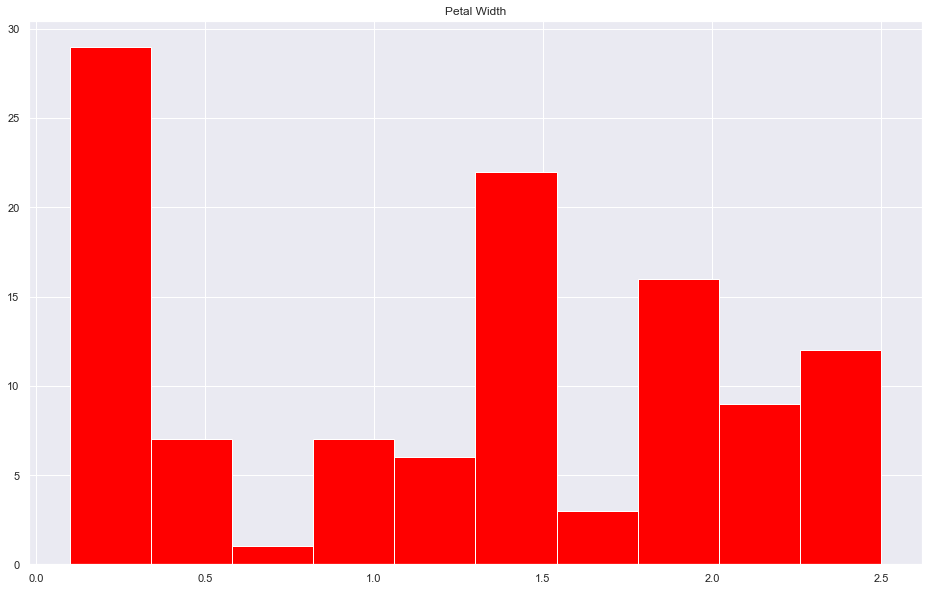

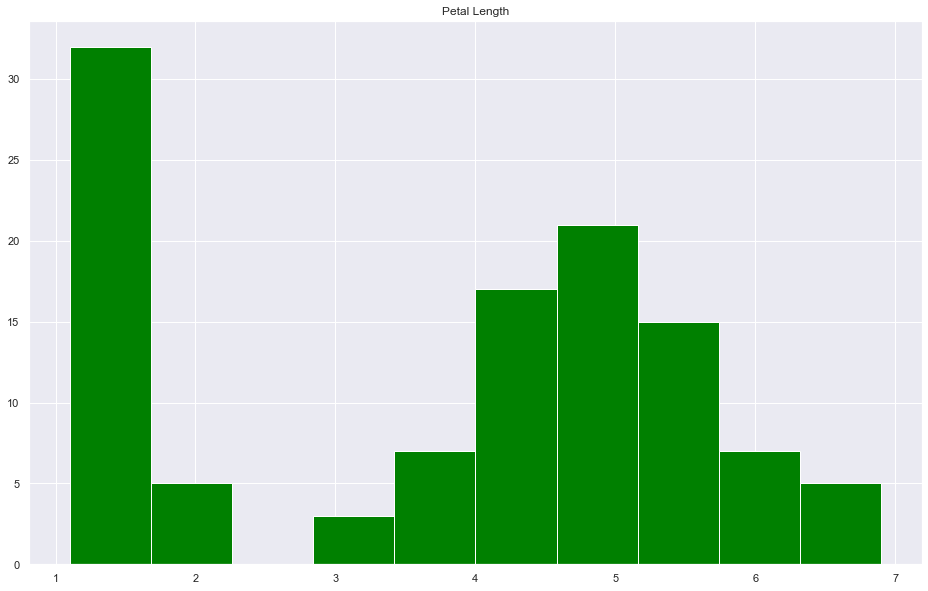

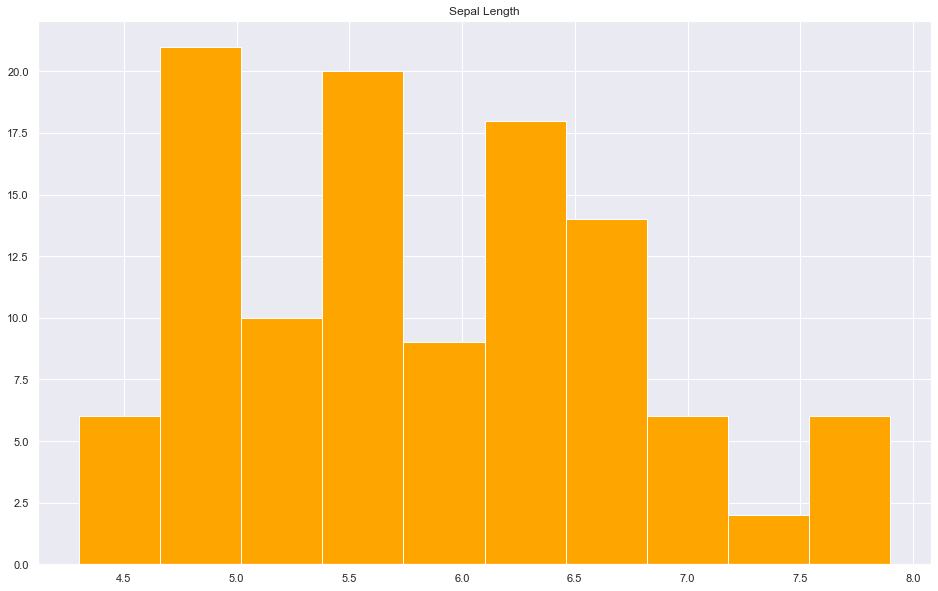

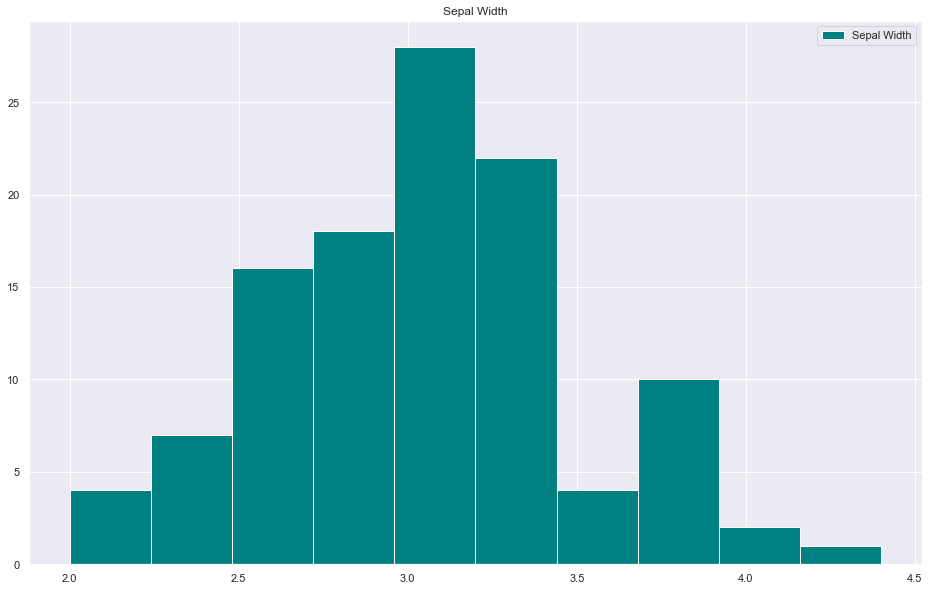

In [165]:
plt.figure(figsize = (16,10))
plt.title('Histogram of Train Set for Iris Measures')
plt.title('Petal Width')
plt.hist(train.petal_width, label = 'Petal Width', color = 'red')
plt.show()
plt.title('Petal Length')
plt.hist(train.petal_length, label = 'Petal Length', color = 'green')
plt.show()
plt.title('Sepal Length')
plt.hist(train.sepal_length, label = 'Sepal Length', color = 'orange')
plt.show()
plt.title('Sepal Width')
plt.hist(train.sepal_width, label = 'Sepal Width', color = 'teal')

plt.legend()


In [166]:
# Target variable
train.species_name.value_counts()

virginica     40
setosa        37
versicolor    35
Name: species_name, dtype: int64

<AxesSubplot:>

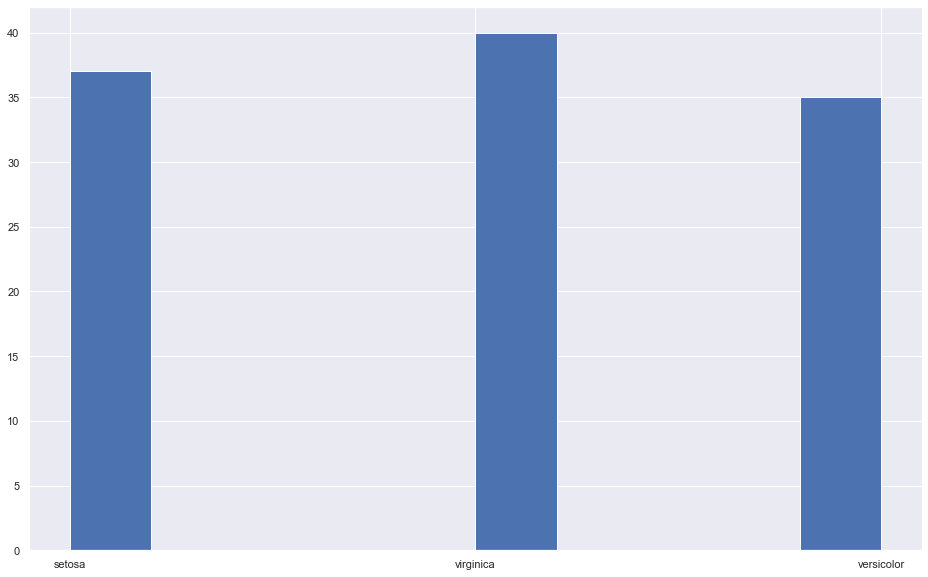

In [167]:
train.species_name.hist()

In [168]:
train_melt = train.melt(id_vars = 'species_name')

train_melt

,species_name,variable,value
0,setosa,species_id,1.0
1,setosa,species_id,1.0
2,setosa,species_id,1.0
3,setosa,species_id,1.0
4,virginica,species_id,3.0
...,...,...,...
667,versicolor,petal_width,1.0
668,virginica,petal_width,2.1
669,virginica,petal_width,2.3
670,setosa,petal_width,0.2


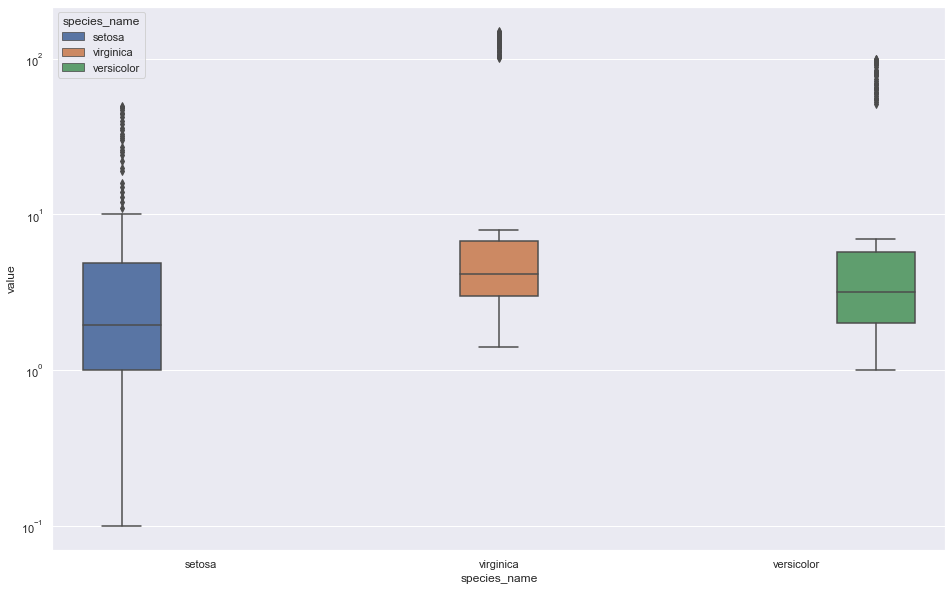

In [200]:
sns.set(rc = {'figure.figsize': (16, 10)})
p = sns.boxplot(data = train_melt, x = 'species_name', y ='value', hue = 'species_name')

p.set(yscale = 'log')

plt.show()

#### - (b).   For each species (categorical variable): create a frequency table and a bar plot of those frequencies.


In [170]:
species = train.species_name.value_counts()
species

virginica     40
setosa        37
versicolor    35
Name: species_name, dtype: int64

<AxesSubplot:>

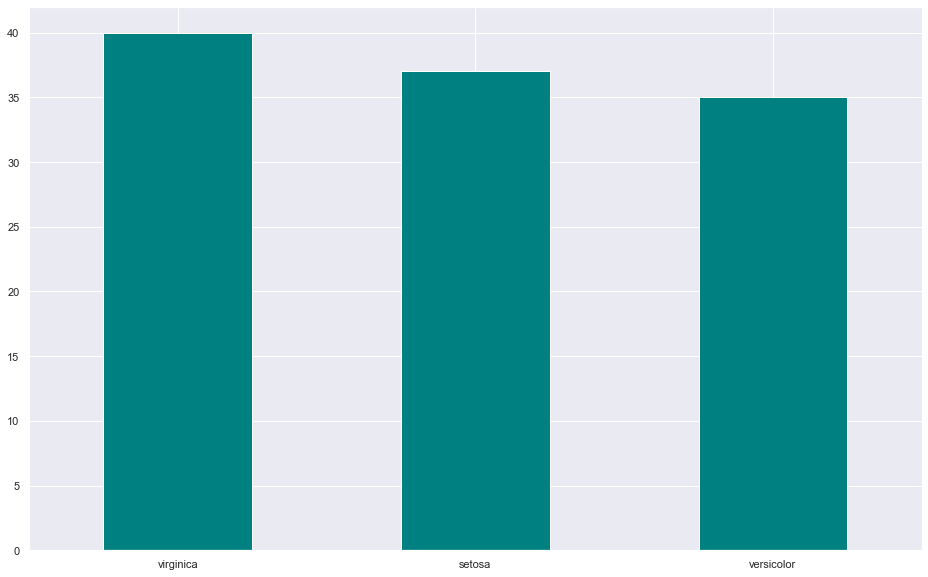

In [191]:
# Frequency of categorical cata (Species)

species.plot.bar(x = 'species_name', color = 'teal', rot = 0)


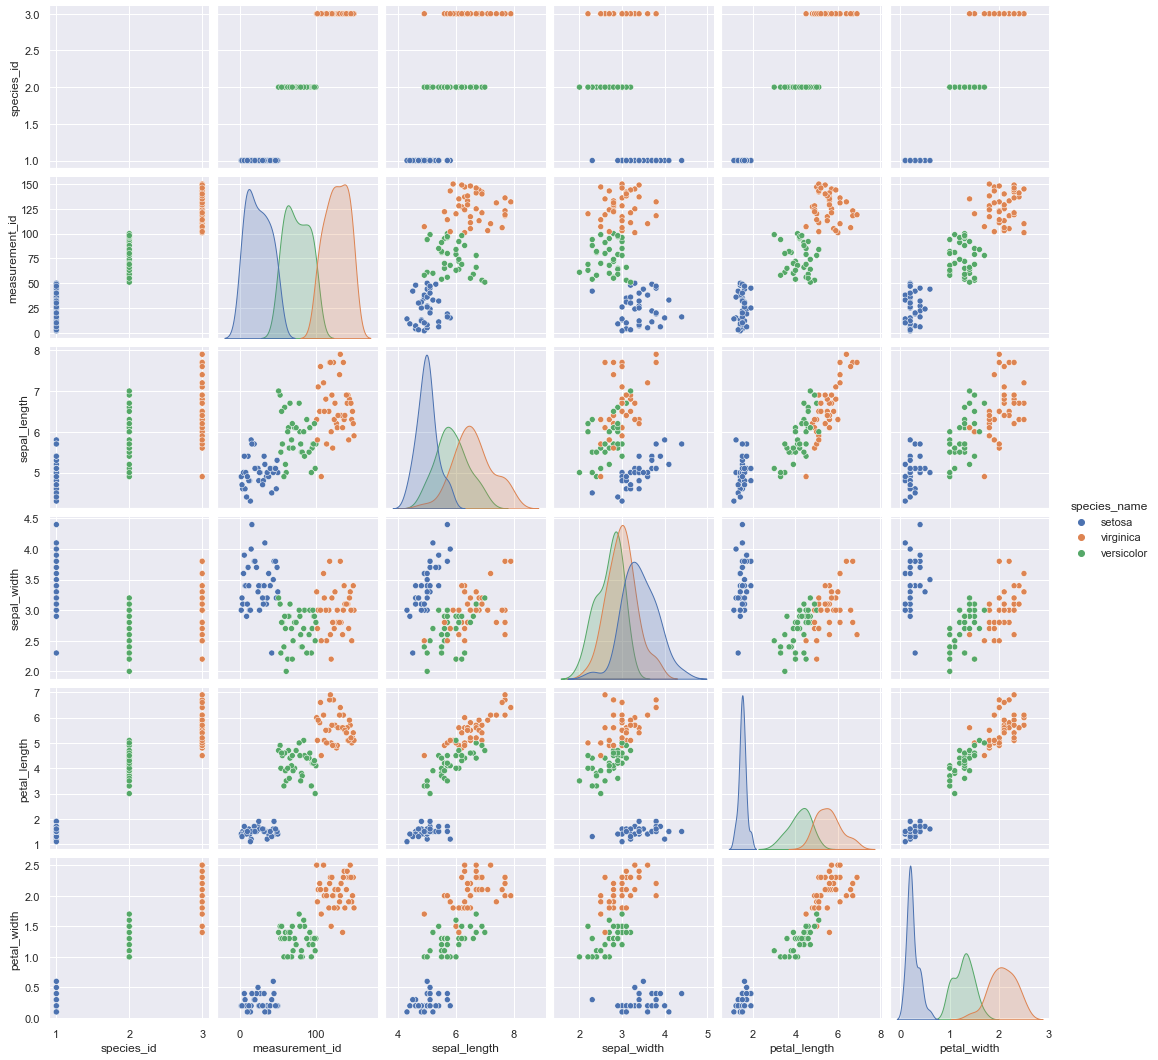

In [193]:
sns.pairplot(train, hue = 'species_name')
plt.show()

#### -  (c).   Document takeaways & any actions.


-  Petal length and petal width have wide outliers in values
-  Sepal length and sepal width have distribution aligned normally 
-  Petal width has the lowest mean length of 1.2
-  Sepal length has the highest means of 5.8
-  Each species has a count of 112
-  Further comparisson examination required on petal length and petal width

# 3). Bivariate Stats

#### a). Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



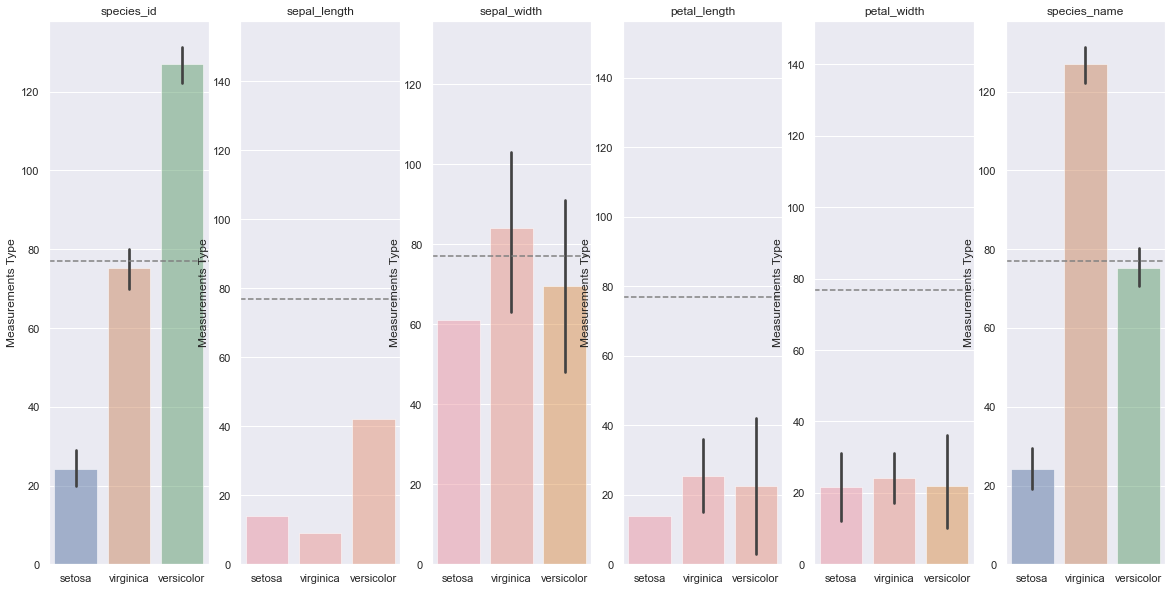

In [172]:
features = ['species_id', 'sepal_length','sepal_width','petal_length','petal_width','species_name']

measurement_mean = train.measurement_id.mean()

_, ax = plt.subplots(nrows = 1, ncols = 6, figsize = (20, 10), sharex = True)

for i, feature in enumerate(features):
    
    sns.barplot(feature,'measurement_id',data = train, ax = ax[i], alpha = 0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Measurements Type')
    ax[i].set_title(feature)
    ax[i].axhline(measurement_mean, ls='--', color='grey')
#     ax[i].legend()

#### b). For each measurement type, compute the descriptive statistics for each species.


In [173]:
# Descriptive Stats Versicolor

train[train.species_name =='versicolor'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2.0,75.342857,5.862857,2.694286,4.191429,1.277143
std,0.0,15.563802,0.540743,0.299944,0.508383,0.192638
min,2.0,51.000000,4.900000,2.000000,3.000000,1.000000
25%,2.0,62.000000,5.500000,2.450000,3.900000,1.100000
50%,2.0,74.000000,5.700000,2.800000,4.200000,1.300000
75%,2.0,89.500000,6.150000,2.900000,4.550000,1.400000
max,2.0,100.000000,7.000000,3.200000,5.100000,1.700000


In [174]:
# Descriptive Stats Setosa

train[train.species_name =='setosa'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1.0,24.270270,4.991892,3.410811,1.497297,0.248649
std,0.0,15.119246,0.343494,0.399155,0.167476,0.116956
min,1.0,2.000000,4.300000,2.300000,1.100000,0.100000
25%,1.0,11.000000,4.800000,3.100000,1.400000,0.200000
50%,1.0,24.000000,5.000000,3.400000,1.500000,0.200000
75%,1.0,36.000000,5.100000,3.700000,1.600000,0.300000
max,1.0,50.000000,5.800000,4.400000,1.900000,0.600000


In [175]:
# Descriptive Stats Verginica


train[train.species_name =='virginica'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,40.0,40.00000,40.000000,40.000000,40.000000,40.000000
mean,3.0,127.05000,6.595000,2.992500,5.562500,2.065000
std,0.0,14.86512,0.666776,0.343726,0.575877,0.262679
min,3.0,101.00000,4.900000,2.200000,4.500000,1.400000
25%,3.0,116.25000,6.200000,2.800000,5.100000,1.900000
50%,3.0,127.50000,6.500000,3.000000,5.550000,2.100000
75%,3.0,140.25000,6.900000,3.200000,5.900000,2.300000
max,3.0,150.00000,7.900000,3.800000,6.900000,2.500000


#### c). For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [176]:
versicolor_mean_petal_width = train[train.species_name =='versicolor'].petal_width.mean()
verginica_mean_petal_width = train[train.species_name =='virginica'].petal_width.mean()

print(f'Mean Petal Width Versicolor: {versicolor_mean_petal_width} \n\nMean Petal Width Verginica:  {verginica_mean_petal_width}')
print('-------------------------------------------------------')
mwu_petal_width_versicolor_virginica = mannwhitneyu(versicolor_mean_petal_width, verginica_mean_petal_width)
print(f'Mann-Whitney Test: {mwu_petal_width_versicolor_virginica}')
print('-------------------------------------------------------')


Mean Petal Width Versicolor: 1.277142857142857 

Mean Petal Width Verginica:  2.0649999999999995
-------------------------------------------------------
Mann-Whitney Test: MannwhitneyuResult(statistic=0.0, pvalue=1.0)
-------------------------------------------------------


In [177]:
# MWU Petal Length

versicolor_mean_petal_length = train[train.species_name =='versicolor'].petal_length.mean()
verginica_mean_petal_length = train[train.species_name =='virginica'].petal_length.mean()

print(f'Mean Petal Width Versicolor: {versicolor_mean_petal_length} \n\nMean Petal Width Verginica:  {verginica_mean_petal_length}')
print('-----------------------------------------------------------')
mwu_petal_lenght_versicolor_virginica = mannwhitneyu(verginica_mean_petal_length, verginica_mean_petal_length)
print(f'Mann-Whitney Test: {mwu_petal_lenght_versicolor_virginica}')
print('-----------------------------------------------------------')


Mean Petal Width Versicolor: 4.191428571428572 

Mean Petal Width Verginica:  5.562499999999998
-----------------------------------------------------------
Mann-Whitney Test: MannwhitneyuResult(statistic=0.5, pvalue=1.0)
-----------------------------------------------------------


In [178]:
# Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu)


virg = train[train.petal_length == 'virginica']
seto = train[train.petal_length == 'setosa']
virs = train[train.petal_length == 'versicolor']


t, p = stats.mannwhitneyu(virg.petal_width, vers.petal_width, alternative = 'greater')

NameError: name 'vers' is not defined

In [203]:
train.species_name.value_counts()

virginica     40
setosa        37
versicolor    35
Name: species_name, dtype: int64

#### d). Document takeaways & any actions.

-  Sepal width has almost twice the length in all species compared to the other measures
-  Sepal length in versicolor species is almost twice the other species
-  Petal width in all species range around 22
-  Our train model is unevently distributed with verginica having 40 samples, setosa: 37 and versicolor: 35


In [179]:
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
34,1,35,4.9,3.1,1.5,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
14,1,15,5.8,4.0,1.2,0.2,setosa
37,1,38,4.9,3.6,1.4,0.1,setosa
146,3,147,6.3,2.5,5.0,1.9,virginica


# 4). Multivariate Stats

#### a).Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.





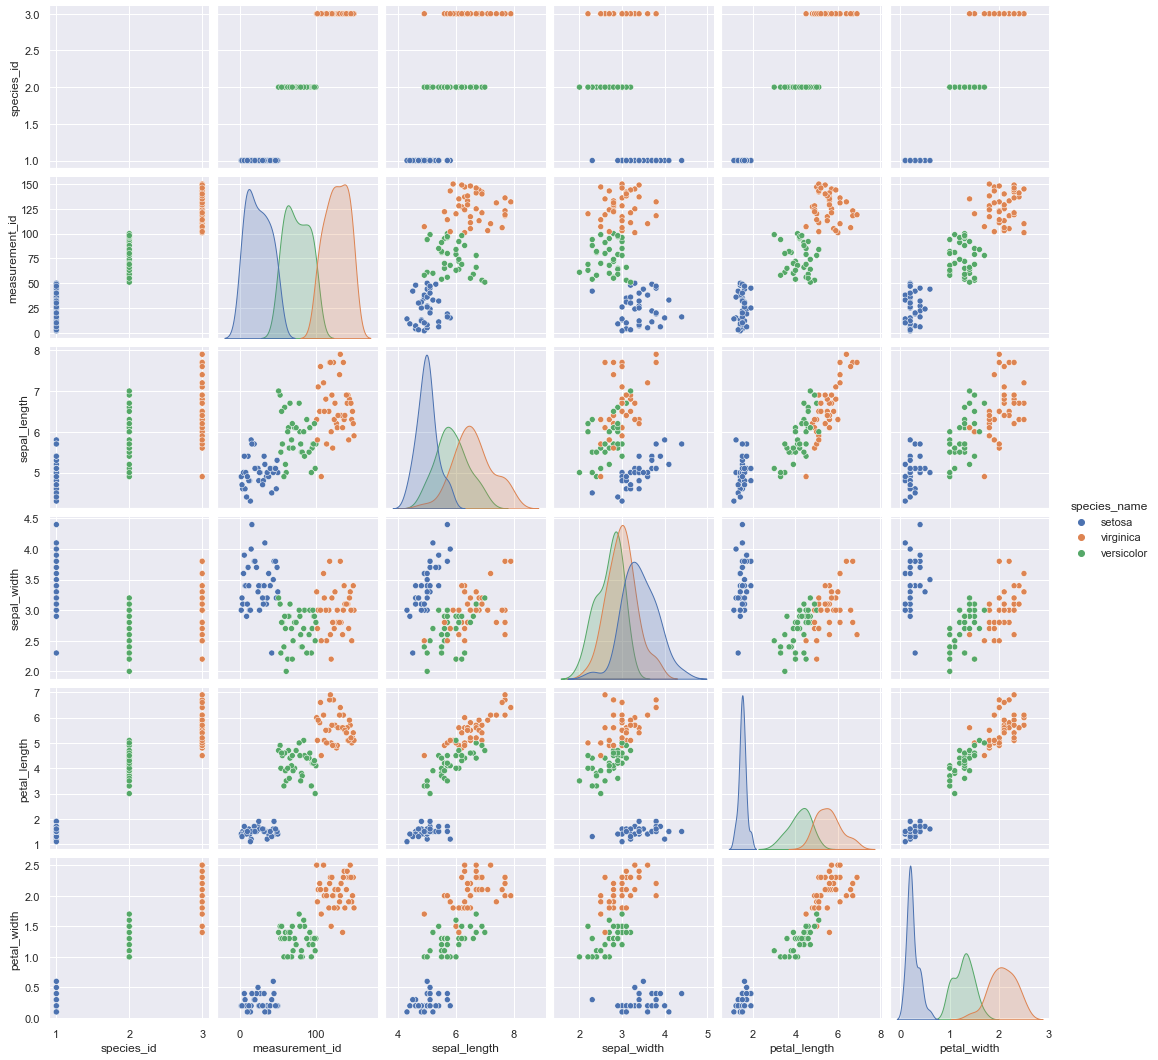

In [194]:
sns.pairplot(train, hue = 'species_name')

<AxesSubplot:xlabel='petal_length', ylabel='measurement_id'>

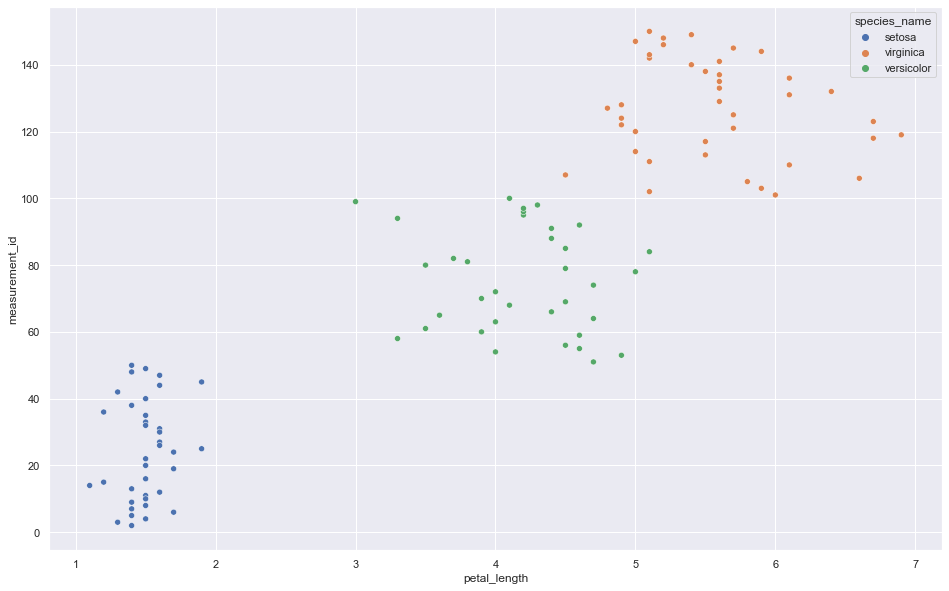

In [181]:
# Scatter plot Petal Length vs measurement ID for the three species

sns.scatterplot(data = train, x = 'petal_length', y = 'measurement_id', hue = 'species_name')

<AxesSubplot:xlabel='sepal_width', ylabel='measurement_id'>

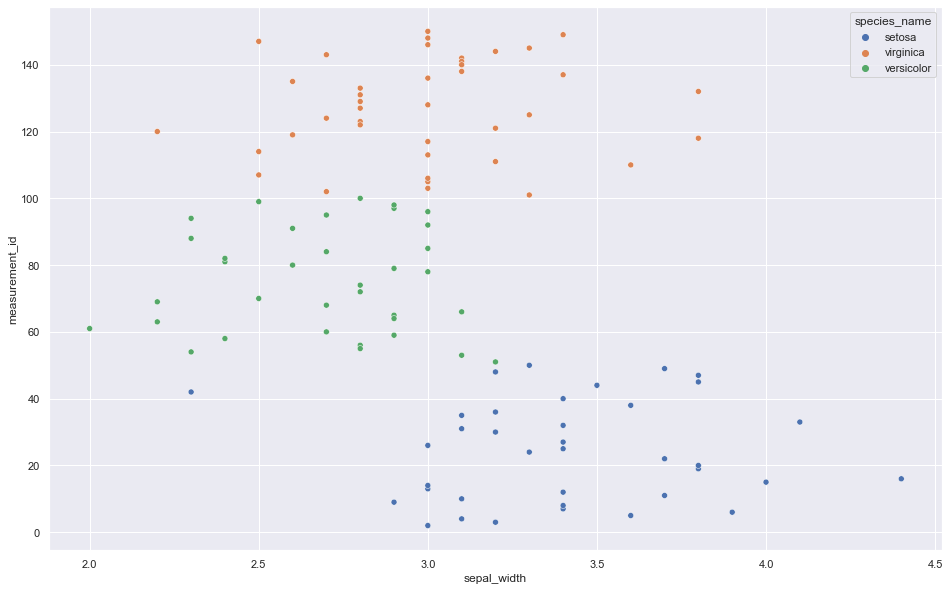

In [182]:
# Scatter plot Sepal Width vs measurement ID for the three species

sns.scatterplot(data = train, x = 'sepal_width', y = 'measurement_id', hue = 'species_name')

In [187]:
# sns.heatmap(train)

In [188]:
# sns.scatterplot(train)

#### b). Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col



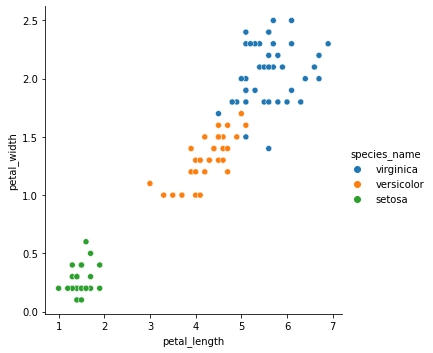

In [17]:
# Not exactly understand the question (mean of species?)*****************

sns.relplot(data = train, x = 'petal_length', y='petal_width', hue = 'species_name')

<AxesSubplot:xlabel='petal_length', ylabel='measurement_id'>

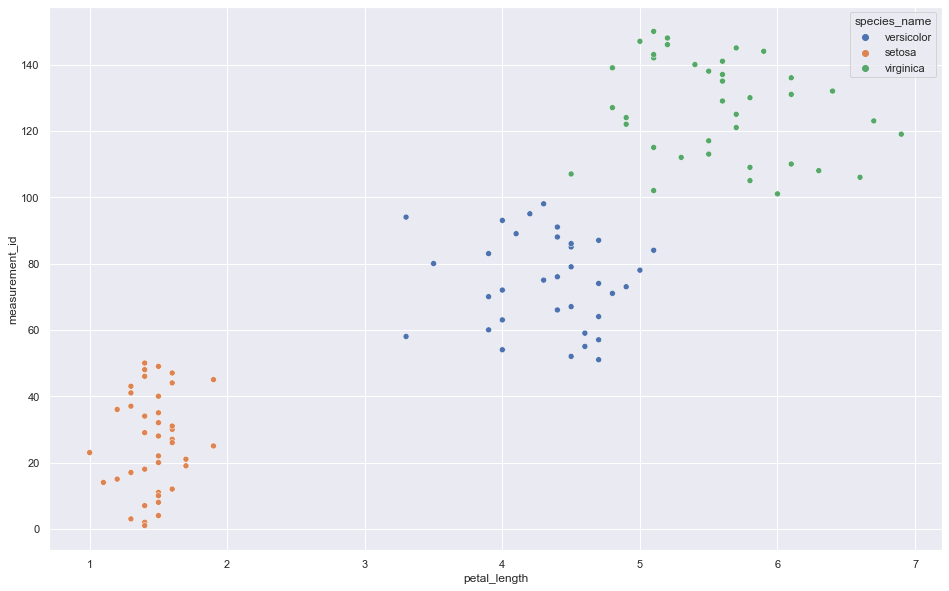

In [29]:
train_melt

,species_name,variable,value
0,virginica,species_id,3.0
1,virginica,species_id,3.0
2,versicolor,species_id,2.0
3,setosa,species_id,1.0
4,versicolor,species_id,2.0
...,...,...,...
667,versicolor,petal_width,1.0
668,versicolor,petal_width,1.3
669,setosa,petal_width,0.6
670,versicolor,petal_width,1.4


#### c). Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



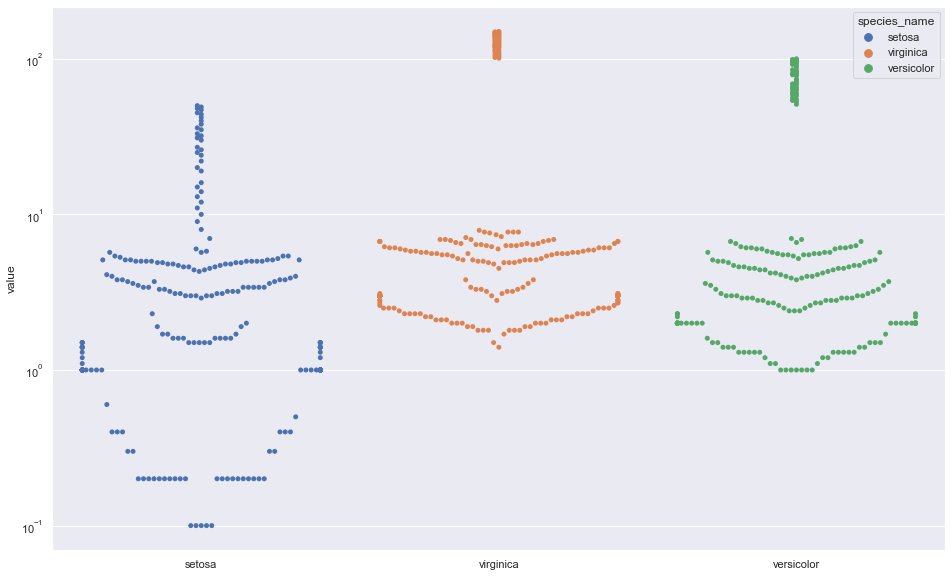

In [197]:
sns.set(rc = {'figure.figsize': (16, 10)})

p = sns.swarmplot(data = train_melt, x = 'species_name', y = 'value', hue = 'species_name')
p.set(yscale = 'log', xlabel = '')
plt.show()

#### d). Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



In [220]:
train.species_name.unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [210]:
train['sepal_area'] = (train.sepal_length * train.sepal_width)
train['petal_area'] = (train.petal_length * train.petal_width)
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
34,1,35,4.9,3.1,1.5,0.2,setosa,15.19,0.30
3,1,4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
14,1,15,5.8,4.0,1.2,0.2,setosa,23.20,0.24
37,1,38,4.9,3.6,1.4,0.1,setosa,17.64,0.14
146,3,147,6.3,2.5,5.0,1.9,virginica,15.75,9.50


In [225]:
setosa_sepal_area = train[train.species_name == 'setosa'].sepal_area.mean()
print(f'Setosa mean sepal Area: {setosa_sepal_area}')
virginica_sepal_area = train[train.species_name == 'virginica'].sepal_area.mean()
print(f'Verginica mean sepal Area: {s_s_a}')
versicolor_sepal_area = train[train.species_name == 'virsicolor'].sepal_area.mean()
print(f'Versicolor mean sepal Area: {s_s_a}')

print()

setosa_petal_area = train[train.species_name == 'setosa'].petal_area.mean()
print(f'Setosa mean petal Area: {setosa_sepal_area}')
virginica_petal_area = train[train.species_name == 'virginica'].petal_area.mean()
print(f'Verginica mean petal Area: {s_s_a}')
versicolor_petal_area = train[train.species_name == 'virsicolor'].petal_area.mean()
print(f'Versicolor mean petal Area: {s_s_a}')


Setosa mean sepal Area: 17.12972972972973
Verginica mean sepal Area: 17.12972972972973
Versicolor mean sepal Area: 17.12972972972973

Setosa mean petal Area: 17.12972972972973
Verginica mean petal Area: 17.12972972972973
Versicolor mean petal Area: 17.12972972972973


In [205]:
versicolor_mean_petal_width = train[train.species_name =='versicolor'].petal_width.mean()
verginica_mean_petal_width = train[train.species_name =='virginica'].petal_width.mean()

print(f'Mean Petal Width Versicolor: {versicolor_mean_petal_width} \n\nMean Petal Width Verginica:  {verginica_mean_petal_width}')
print('-------------------------------------------------------')
mwu_petal_width_versicolor_virginica = mannwhitneyu(versicolor_mean_petal_width, verginica_mean_petal_width)
print(f'Mann-Whitney Test: {mwu_petal_width_versicolor_virginica}')
print('-------------------------------------------------------')

Mean Petal Width Versicolor: 1.277142857142857 

Mean Petal Width Verginica:  2.0649999999999995
-------------------------------------------------------
Mann-Whitney Test: MannwhitneyuResult(statistic=0.0, pvalue=1.0)
-------------------------------------------------------


In [224]:
# mwu_petal_area_versicolor_virginica = mannwhitneyu(versicolor_petal_area, virginica_petal_area )
# print(f'Mann-Whitney Test: {mwu_petal_area_versicolor_virginica}')
# print('-----------------------------------------------------------')

#### e). Document takeaways and any actions.

-  Sepal and petal area of all three species average around 17.125
-  Mean petal width of verginica species is almost twice that of versicolor

In [ ]:
-